PA3
Author: Zhuangzhuang Gong, Richard Hua

## 1. Reflection on the annotation task

**Challenges**  
One of the key challenges is that we found it hard to understand the tweets with the culture references and context outside of the tweet itself.  
In this case, we had to make judgement calls,
which made us more aware of the subjectivity involved in annotation. Another takeaway is dealing
with mixed-sentiment tweets. For example, some tweets consist of both positive and negative emotions, making it hard to label them definitively.

**Ideals of improvement**  
- To improve the process of annotation, refine and expand the guidelines of annotation by providing clearer annotation instructions, especially for
mixed-sentiment tweets. This will reduce the subjectivity in the annotation.
- Another way to improve is to introduce InterAnnotator Agreement by having multiple annotators and comparing their results. This not only improve the quality of annotation but also give the insight how subjective the sentiment label is.
- Instead of asking annotators to type in the labels, provide fixed optional labels and guide annotators to select from them to reduce the typo issues.

## 2. Exploring the crowdsourced data


**Read and observe the data**  
As we can see, the sentiment annotations are not expected. There are many inconsistent label formats, such as 'neutral' and 'Neutral' or typos like 'Nutral'. Therefore, we need to clean the data.

In [68]:
import pandas as pd

crowd_train_data = pd.read_csv('crowdsourced_train.csv',sep='\t')
gold_train_data = pd.read_csv('gold_train.csv', sep='\t')
test_data = pd.read_csv('test.csv', sep='\t')
label_counts = crowd_train_data['sentiment'].value_counts()
print(crowd_train_data)

      sentiment                                               text
0      Positive  There's so much misconception on Islam rn so s...
1      Positive  @Mr_Rondeau You should try Iron Maiden at abou...
2      Negative  Going to #FantasticFour tomorrow. Half expecti...
3       Neutral  @cfelan hey hey, just checkng to see if you or...
4      Positive  does anyone just get drunk and watch twilight ...
...         ...                                                ...
10671  Positive  Glad to hear there may be a bigger more public...
10672  Positive  Great stand by the Wolves on 3rd and long. Cur...
10673   Neutral  Ayyye I just purchased my Ed Sheeran tickets f...
10674  Negative  The anti-semitism, the misogyny, and the suppo...
10675  Positive  And yet, I have yet to see the whole series of...

[10676 rows x 2 columns]


**Check the agreement before cleaning the data**  
If we check the inner annotation agreement now by comparing the sentiment labels from the crowdsourced annotator and the gold annotator across 10,675 tweets. The overall accuracy is only 35.63%, and Cohen's Kappa is only 0.19, which indicates a low level of agreement.
This suggests there's either inconsistency or subjective interpretation of sentiment labels.

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score

accuracy = accuracy_score(crowd_train_data['sentiment'], gold_train_data['sentiment'])
kappa = cohen_kappa_score(crowd_train_data['sentiment'], gold_train_data['sentiment'])
print(f"Cohen's Kappa: {kappa:.2f}")
print(f"Accuracy: {accuracy:.2%}")

Cohen's Kappa: 0.19
Accuracy: 35.63%


**Clean and re-classify labels**  
We easily fixed some inconsistent label formats by converting all labels to lowercase and stripping the blank spaces.  
Furthermore, we found several spelling variations and formatting issues in the label column (e.g., 'nuetral', 'positve', 'nedative', etc.). These were normalised using a mapping dictionary, and all labels were successfully consolidated into the three standard sentiment categories: positive, neutral, and negative.

In [72]:
# convert labels to lowercase
crowd_train_data['sentiment'] = crowd_train_data['sentiment'].str.strip().str.lower()
label_counts = crowd_train_data['sentiment'].value_counts()
print("before cleaning")
print(label_counts)

before cleaning
sentiment
neutral           5046
positive          3213
negative          2375
netural             20
nuetral              3
postive              2
postitive            1
neutal               1
npositive            1
neutra l             1
positie              1
negayive             1
nutral               1
neugral              1
negtaive             1
neutrla              1
neutrall             1
neural               1
netutral             1
_x0008_neutral       1
nedative             1
neutral?             1
positve              1
Name: count, dtype: int64


In [73]:
# create a dictionary
label_map = {
    # positive 
    'positve': 'positive',
    'postive': 'positive',
    'postitive': 'positive',
    'positie': 'positive',
    'npositive': 'positive',

    # neutral 
    'neutral?': 'neutral',
    'nuetral': 'neutral',
    '_x0008_neutral': 'neutral',
    'netural': 'neutral',
    'netutral': 'neutral',
    'neural': 'neutral',
    'neutrall': 'neutral',
    'neugral': 'neutral',
    'neutrla': 'neutral',
    'nutral': 'neutral',
    'neutra l': 'neutral',
    'neutal': 'neutral',

    # negative 
    'nedative': 'negative',
    'negtaive': 'negative',
    'negayive': 'negative',
}

label_map.update({
    'positive': 'positive',
    'neutral': 'neutral',
    'negative': 'negative'
})

# apply the dictionary
crowd_train_data['sentiment'] = crowd_train_data['sentiment'].map(label_map)

# check the result
print("After cleaning")
print(crowd_train_data['sentiment'].value_counts())


After cleaning
sentiment
neutral     5079
positive    3219
negative    2378
Name: count, dtype: int64


**Agreement checking after cleaning**  
We evaluated the agreement between the crowd-sourced labels and gold standard labels again across the data after cleaning the labels. The overall accuracy was 65.49% and the Cohen's Kappa was 0.45, indicating 'average' agreement, according to the standard in Richard Johansson's slides.  
This suggests that there's reasonable alignment, while some inconsistency still remains. It's likely due to subjective interpretation of semtimemt tweets.

In [75]:
accuracy = accuracy_score(crowd_train_data['sentiment'], gold_train_data['sentiment'])
kappa = cohen_kappa_score(crowd_train_data['sentiment'], gold_train_data['sentiment'])
print(f"Cohen's Kappa: {kappa:.2f}")
print(f"Accuracy: {accuracy:.2%}")

Cohen's Kappa: 0.45
Accuracy: 65.49%


**Analysis of the annotation distribution**  
We compared the annotation distribution across crowdsourced and gold data. Both showed a similar overall distribution structure, with the majority of labels being 'neutral', followed by 'positive' then 'negative'. However, there's a noticeable difference between 'negative', indicating the sensitivity or interpretation for negative tweets between two groups varies. It suggests that the crowd group is more sensitive to negative sentiment or subjective interpretation of negative tweets, which may contribute to the Cohen's Kappa of 0.45 and the general accuracy of 65.49%.

In [77]:
# Get label counts from each dataset
crowd_counts = crowd_train_data['sentiment'].value_counts()
gold_counts = gold_train_data['sentiment'].value_counts()

# Access values 
crowd_counts_dict = {
    'neutral': crowd_counts.get('neutral', 0),
    'positive': crowd_counts.get('positive', 0),
    'negative': crowd_counts.get('negative', 0)
}

gold_counts_dict = {
    'neutral': gold_counts.get('neutral', 0),
    'positive': gold_counts.get('positive', 0),
    'negative': gold_counts.get('negative', 0)
}

# Create Series
crowd_series = pd.Series(crowd_counts_dict, name='Crowd')
gold_series = pd.Series(gold_counts_dict, name='Gold')

# Combine and analyze
comparison_df = pd.concat([crowd_series, gold_series], axis=1)

# Add percentage comparision
total = comparison_df.sum()
comparison_df['Crowd (%)'] = (comparison_df['Crowd'] / total['Crowd'] * 100).round(2)
comparison_df['Gold (%)'] = (comparison_df['Gold'] / total['Gold'] * 100).round(2)

print(comparison_df)

          Crowd  Gold  Crowd (%)  Gold (%)
neutral    5079  5364      47.57     50.24
positive   3219  3652      30.15     34.21
negative   2378  1660      22.27     15.55


## 3. Implementation of a classifier  
In this part, we took the linear SVC as a baseline, explained the process of optimization of the model. And we used both the crowdsource and gold-standard labels to train optimized model, then, compared the results. 

Besides, we explored several different models. We used logistic regression and MLP to 

**Clean tweets**  
Before we started, we cleaned the data before we train the model to reduce the effect of noisy characters and formats issues. 

In [80]:
import re
import emoji

def clean_tweet(text):
    # 1. Lowercase
    text = text.lower()
    # 2. Replace URLs
    text = re.sub(r'http\S+|www\.\S+', ' ', text)
    # 3. Replace user mentions
    text = re.sub(r'@\w+', ' ', text)
    # 4. Remove hashtags but keep the tag text
    text = re.sub(r'#', '', text)
    # 5. Remove RT (retweet marker)
    text = re.sub(r'\brt\b', ' ', text)
    # 6. Remove emojis or translate them to text
    text = emoji.demojize(text)  # ":smile:" etc
    # 7. Remove non-alphanumeric (keep spaces)
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    # 8. Collapse whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

**3.1 LinearSVC**  
We tried a combination of Tfidvectorizer and LinearSVC. The combination of the two can quickly "feed" massive text into the model, but also achieve a good balance between accuracy and computational resources, which is one of the most common and validated approaches in text classification.3.

In [122]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

X_crowd = crowd_train_data['text'].apply(clean_tweet)
Y_crowd = crowd_train_data['sentiment']

X_test = test_data['text'].apply(clean_tweet)
Y_test = test_data['sentiment']

pipeline = Pipeline([("tfidf", TfidfVectorizer(strip_accents='unicode', sublinear_tf=True)),
                     ("svc", LinearSVC(dual='auto'))])
clf = pipeline.fit(X_crowd, Y_crowd)
acc = accuracy_score(Y_test, clf.predict(X_test))
print("acc:",acc)

acc: 0.6173062997827661
f1_w: 0.6164180770579569


To ensure that the classifier has better performance and is more reliable. We used hyperparameter search and cross-validation to select a set of parameters that work better on unknown data in order to maximise the model's performance.

The reason we used hyperparameter search was that it helps improve the predictive performance by finding the optimal settings. Also, it helps balance the model between overfitting and underfitting. On the other hand, cross-validation averages the performance by splitting the data, reducing the variance of the estimation.

**The grid of hyperparameters**  
- 'tfidf__ngram_range' tells the vectorizer to extract all contiguous word-sequences (n-grams) whose length is between (1,1) and (1,2) and see which one performs better.  
- 'tfidf__max_df' tells the vectorizer to ignore certain degrees of super-common terms when establishing a dictionary. We searched three common levels of percentage of degrees to filter the noise but also keep the essential terms.   
- 'tfidf__min_df' tells the vectorizer to ignore certain degrees of rare terms when establishing a dictionary.  We searched three common levels of the amount of rare terms.  
- 'tfidf__max_features' tells the vectorizer the cap vocabulary size.  We tried two different sizes.  
- 'svc__C' refers to the punishing coefficient. The smaller the value, the stronger regularisation it has. We set different levels of regularisation to explore the trade-off between overfitting and underfitting.  

In [124]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

# set up a grid of hyperparameters to search over
param_grid = {
    # TF–IDF params
    'tfidf__ngram_range': [(1,1), (1,2)],    # unigrams vs unigrams+bi-grams
    'tfidf__max_df':       [0.75, 0.85, 1.0], # ignore super-common terms
    'tfidf__min_df':       [3, 5, 10],        # ignore rare terms
    'tfidf__max_features':[10_000, 20_000],   # cap vocabulary size

    # LinearSVC params
    'svc__C':              [0.1, 1.0, 10.0],  # regularization strength
}

# choose a cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# wrap in GridSearchCV
grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='f1_weighted',  
    n_jobs=-1,              # use all cores
    verbose=1,
)

# fit
grid.fit(X_crowd, Y_crowd)
print("Best parameters:\n", grid.best_params_)
print("Best CV score:", grid.best_score_)

# evaluate on held-out test set
y_crowd_pred = grid.predict(X_test)
print(classification_report(Y_test, y_crowd_pred, digits=4))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters:
 {'svc__C': 1.0, 'tfidf__max_df': 0.75, 'tfidf__max_features': 10000, 'tfidf__min_df': 10, 'tfidf__ngram_range': (1, 1)}
Best CV score: 0.5566823740476127
              precision    recall  f1-score   support

    negative     0.5040    0.4717    0.4873      1077
     neutral     0.5975    0.7185    0.6524      2597
    positive     0.6734    0.5070    0.5785      1850

    accuracy                         0.5996      5524
   macro avg     0.5916    0.5657    0.5727      5524
weighted avg     0.6047    0.5996    0.5955      5524



**Cross-validation**  
There's a slight dropping down on the weighted F1 score. 5-fold CV trains each model on only 80 % of the data per fold and then averages over five splits, so it yields a more conservative estimate than a single run on 100 % of the data.
GridSearchCV optimises hyperparameters for average CV performance, which may underperform on the one specific test split.

However, in order to pursue better generalisation of the model, we chose the cross-validation optimized model.

In [128]:
best_clf = grid.best_estimator_
y_pred_test = best_clf.predict(X_test)
print("Test weright F1:", f1_score(Y_test, y_pred_test, average='weighted'))

Test weright F1: 0.5954742459828205


**Result Analysis**  
a) Comparasion of crowd-sourced to gold-standard labels  
Switching from crowd-sourced to gold-standard labels boosted overall accuracy from 59.96% to 67.87% and weighted F1 from 0.59 to 0.67. In particular, positive-class recall jumped by 14.6 points, neutral F1 rose by 6.06 points, and negative precision increased by 17.32 points, showing that the cleaner gold labels yield much clearer decision boundaries.

b) Cnfusion matrix  
The model predicts neutral best, with 2006 of 2597 true neutral tweets correctly identified.  
Negative examples are often misclassified as neutral (437 cases), limiting its recall (49.7%).  
Positive tweets are confused with neutral too (587 cases), though over 65% of them are correctly found.

              precision    recall  f1-score   support

    negative     0.6772    0.4968    0.5731      1077
     neutral     0.6620    0.7724    0.7130      2597
    positive     0.7089    0.6530    0.6798      1850

    accuracy                         0.6787      5524
   macro avg     0.6827    0.6407    0.6553      5524
weighted avg     0.6807    0.6787    0.6746      5524



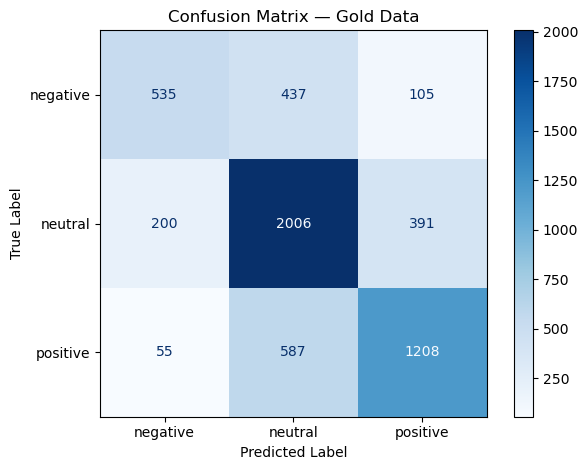

In [192]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# gold data
X_gold = gold_train_data['text'].apply(clean_tweet)
Y_gold = gold_train_data['sentiment']

#split data
# X_gold_train, X_gold_eval, Y_gold_train, Y_gold_eval = train_test_split(X_gold, Y_gold, test_size=0.2, random_state=42)

grid.best_estimator_.fit(X_gold, Y_gold)

# evaluate on held-out test set
Y_gold_pred = grid.predict(X_test)
print(classification_report(Y_test, Y_gold_pred, digits=4))

# compute and render the confusion matrix for error analysis
cm = confusion_matrix(Y_test, Y_gold_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)                           # blue palette for clarity
plt.title('Confusion Matrix — Gold Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

**3.2 Logistic regression**  
We also tried using logistic regression.
In this section, we used pipeline ties to TF–IDF vectorization directly to the classifier, avoiding manual transform steps.

GridSearchCV finds the best C, penalty, and class_weight for each dataset separately.

Each call to evaluate_logreg refits on the full training split (crowd vs gold) and then evaluates on your external test set.

The confusion matrix plot alongside the classification report highlights exactly where your logistic model confuses classes in each scenario.

Fitting 5 folds for each of 128 candidates, totalling 640 fits

=== Crowd LogisticRegression ===
Best hyperparameters: {'clf__C': 1, 'clf__class_weight': None, 'clf__penalty': 'l1', 'tfidf__max_features': 10000, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}
Test Accuracy: 0.6456
Classification Report:
              precision    recall  f1-score   support

    negative     0.6889    0.3256    0.4422       476
     neutral     0.6104    0.8789    0.7205      1016
    positive     0.7388    0.5140    0.6062       644

    accuracy                         0.6456      2136
   macro avg     0.6794    0.5728    0.5896      2136
weighted avg     0.6666    0.6456    0.6240      2136



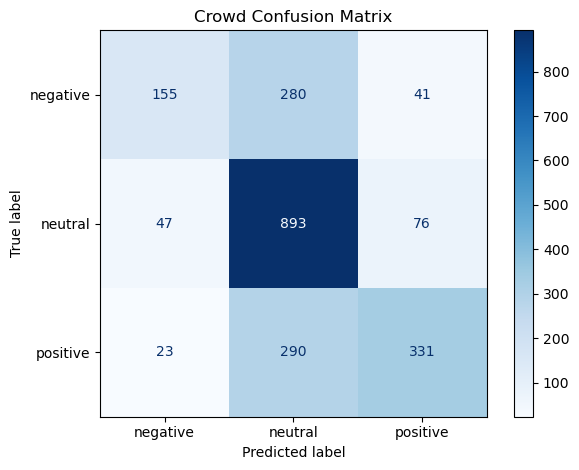

Fitting 5 folds for each of 128 candidates, totalling 640 fits

=== Gold LogisticRegression ===
Best hyperparameters: {'clf__C': 1, 'clf__class_weight': None, 'clf__penalty': 'l1', 'tfidf__max_features': 5000, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 1)}
Test Accuracy: 0.6788
Classification Report:
              precision    recall  f1-score   support

    negative     0.7174    0.2982    0.4213       332
     neutral     0.6442    0.8723    0.7411      1073
    positive     0.7615    0.5677    0.6505       731

    accuracy                         0.6788      2136
   macro avg     0.7077    0.5794    0.6043      2136
weighted avg     0.6957    0.6788    0.6604      2136



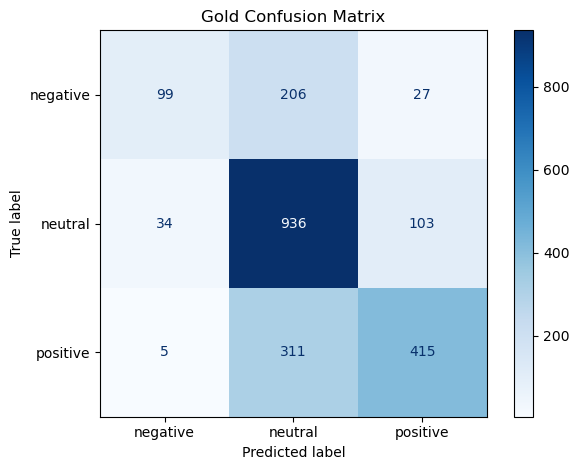

In [206]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# ————————————————————————————————————————————————
# 1) Define a reusable TF–IDF + LogisticRegression pipeline
tfidf = TfidfVectorizer(
    preprocessor=clean_tweet,   # apply your cleaning function
    stop_words='english',
    ngram_range=(1, 2),         # unigrams + bigrams for richer features
    max_features=10000          # cap vocabulary size
)

pipeline = Pipeline([
    ('tfidf', tfidf),
    ('clf', LogisticRegression(solver='liblinear', random_state=42))
])

# 2) Hyperparameter grid mirroring LinearSVC exploration
param_grid = {
    # —— tune vectorizer too ——  
    'tfidf__max_features': [5000, 10000],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__min_df': [1, 3],

    # —— and still tune the classifier ——  
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2'],
    'clf__class_weight': [None, 'balanced']
}


# ————————————————————————————————————————————————
def evaluate_logreg(X_train, y_train, X_test, y_test, label):
    """
    1) Grid-search LogisticRegression on X_train / y_train
    2) Refit best model and predict on external test set
    3) Report accuracy, classification report, and confusion matrix
    """
    grid = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1,
        refit=True
    )
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    print(f"\n=== {label} LogisticRegression ===")
    print("Best hyperparameters:", grid.best_params_)

    # performance on held-out test set
    preds = best_model.predict(X_test)
    print(f"Test Accuracy: {accuracy_score(y_test, preds):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, preds, digits=4))

    # confusion matrix for error‐pattern analysis
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(cm, display_labels=best_model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{label} Confusion Matrix")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.tight_layout()
    plt.show()

# ————————————————————————————————————————————————
# 3) Run evaluation on both Crowd and Gold data
evaluate_logreg(X_crowd, Y_crowd, X_crowd_test, Y_crowd_test, label="Crowd")
evaluate_logreg(X_gold,  Y_gold,  X_gold_test,  Y_gold_test,  label="Gold")


**Results Analysis**  
a) Overall, training on cleaner, expert-annotated “Gold” data gives you a ~3-point boost in accuracy.

b) Crowd needed the larger vocabulary (10 k) to compensate for noisier labels, while Gold worked best with a smaller vocab and a higher min_df to ignore rare terms.

c) From the confusion matrix, we observe that in Crowd, the model leans heavily toward “neutral” (dark middle cell), misclassifying many true negatives/positives as neutral.
 However, in Gold, “neutral” still dominates, but you see a clearer block of true positives on the bottom-right—meaning the model is better at recognizing positive tweets when labels are clean.

**3.3 Neural Network Model**

**MLP with RandomizedSearchCV**

In this section we implemented a function that automates a typical text‐classification workflow using a neural network, and then visualizes its performance via a confusion matrix. We structure it as a single reusable routine so that we can plug in different train/test splits (for example, “crowd” vs. “gold” labels) without rewriting the same code.

- We convert string class labels (e.g. “positive”, “negative”, “neutral”) into integer codes. Neural networks require numeric targets, and using LabelEncoder ensures the mapping is consistent between train and test sets.
- We build a pipeline combining TF–IDF Vectorizer and MLPClassifier.
- Instead of picking arbitrary hidden-layer sizes, regularization strengths, or learning rates, we let RandomizedSearchCV explore a small grid.
- We perform 2-fold CV over 5 random parameter combinations. This balances thoroughness and speed. After finding the best parameters, RandomizedSearchCV automatically refits the pipeline on the full training set using those optimal settings.
- We extract the chosen hyperparameters, compute test-set accuracy, and print a detailed breakdown (precision, recall, F1) for each class.
- Plotting the confusion matrix gives an intuitive, class-by-class view of where the model tends to make errors. This is invaluable for diagnosing which classes are most frequently confused.

In [208]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from scipy.stats import uniform
# evaluation function
def evaluate_mlp_with_confusion(X_train, y_train, X_test, y_test, dataset_label):
    # 1) turn text labels into integer classes
    encoder = LabelEncoder()
    y_train_enc = encoder.fit_transform(y_train)
    y_test_enc  = encoder.transform(y_test)
    
    # 2) build a single pipeline: TF–IDF vectorizer → MLP classifier
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(
            preprocessor=clean_tweet,      # custom text cleaner
            stop_words='english',          # remove English stop words
            max_features=3000              # limit vocab size for speed
        )),
        ('mlp', MLPClassifier(
            activation='relu',
            solver='adam',
            early_stopping=True,           # stop when validation score stalls
            max_iter=100,                  # cap epochs to speed up
            random_state=0
        ))
    ])
    
    # 3) define a small hyperparameter search space
    search_space = {
        'mlp__hidden_layer_sizes': [(128, 64), (256, 128)],
        'mlp__alpha': uniform(1e-5, 1e-3),
        'mlp__learning_rate_init': uniform(1e-4, 1e-2)
    }
    
    # 4) run randomized CV search
    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=search_space,
        n_iter=5,               # fewer trials for faster turnaround
        scoring='accuracy',
        cv=2,                   # 2-fold CV
        random_state=0,
        n_jobs=-1,
        verbose=1
    )
    search.fit(X_train, y_train_enc)
    
    # 5) evaluation metrics
    best_params = search.best_params_
    preds = search.predict(X_test)
    acc = accuracy_score(y_test_enc, preds)
    
    print(f"=== {dataset_label} DATASET ===")
    print("Best hyperparameters:", best_params)
    print(f"Test accuracy: {acc:.4f}\n")
    print("Classification report:")
    print(classification_report(y_test_enc, preds, target_names=encoder.classes_, digits=4))
    
    # 6) confusion matrix plot
    cm = confusion_matrix(y_test_enc, preds)
    disp = ConfusionMatrixDisplay(cm, display_labels=encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{dataset_label} Confusion Matrix")
    plt.show()
    print("\n" + "-"*60 + "\n")




Fitting 2 folds for each of 5 candidates, totalling 10 fits
=== Crowd DATASET ===
Best hyperparameters: {'mlp__alpha': 0.0005588135039273248, 'mlp__hidden_layer_sizes': (256, 128), 'mlp__learning_rate_init': 0.008542657485810174}
Test accuracy: 0.5831

Classification report:
              precision    recall  f1-score   support

    negative     0.4872    0.6017    0.5384      1077
     neutral     0.5729    0.7189    0.6376      2597
    positive     0.7551    0.3816    0.5070      1850

    accuracy                         0.5831      5524
   macro avg     0.6051    0.5674    0.5610      5524
weighted avg     0.6172    0.5831    0.5745      5524



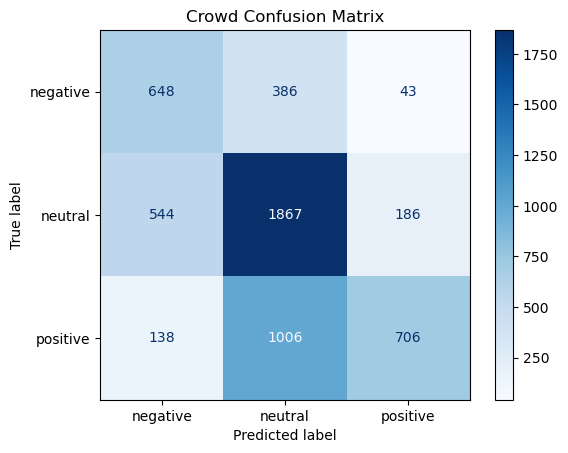


------------------------------------------------------------

Fitting 2 folds for each of 5 candidates, totalling 10 fits
=== Gold DATASET ===
Best hyperparameters: {'mlp__alpha': 6.671297731744318e-05, 'mlp__hidden_layer_sizes': (128, 64), 'mlp__learning_rate_init': 0.0039344151882577776}
Test accuracy: 0.6039

Classification report:
              precision    recall  f1-score   support

    negative     0.7000    0.0065    0.0129      1077
     neutral     0.5603    0.8853    0.6863      2597
    positive     0.7300    0.5568    0.6317      1850

    accuracy                         0.6039      5524
   macro avg     0.6634    0.4828    0.4436      5524
weighted avg     0.6444    0.6039    0.5367      5524



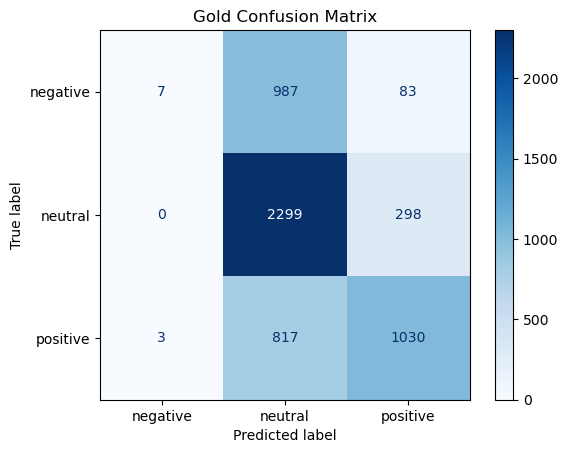


------------------------------------------------------------



In [212]:
# run evaluations on both datasets
evaluate_mlp_with_confusion(
    X_crowd, Y_crowd,
    X_test,  Y_test,
    dataset_label="Crowd"
)

evaluate_mlp_with_confusion(
    X_gold, Y_gold,
    X_test,  Y_test,
    dataset_label="Gold"
)

**Result Analysis**  
a) Overall, the model trained on the higher-quality (gold) labels achieves about a 2 pp higher overall accuracy. This suggests that label noise in the crowd annotations is hurting the neural network’s ability to learn clean decision boundaries.

- Stronger regularisation (higher α) was needed on the noisier Crowd labels, likely to curb overfitting to label errors.
- A larger network (256→128) also appeared beneficial on the crowd data—perhaps to capture its higher variance—whereas the cleaner Gold labels could be modeled well with the smaller (128→64) network.

b) In the aspect of class-by-class performance, the extreme under-recall on “negative” in the Gold run points to a strong class imbalance and/or overlapping features—after tuning, the model “gives up” on the minority class because learning to predict neutral well boosts global accuracy more.
In contrast, with crowd noise, it still makes a non-trivial number of negative predictions, perhaps because the label noise smears the decision boundary and makes negative examples seem more distinct.

c) What we observed from confusion-matrix analysis: 
- On Crowd, confusion is roughly symmetrical between negative↔neutral and positive↔neutral, indicating the model’s boundaries between sentiment classes are washed out by noisy labels.
- On Gold, nearly all negatives are misclassified as neutral, confirming the recall collapse.

**Next Steps**  
Although we hypothesized that a neural network would surpass linear models by learning non-linear feature combinations, the MLP fell short. Possible reasons include:

- TF–IDF vectors (3k–5k dimensions) are too sparse for a shallow MLP (two hidden layers) to discover robust non-linear patterns—linear separability already suffices, so the network can’t exploit additional structure.  
- With only a few thousand training examples and noisy crowd labels, the MLP may under-fit (not enough signal) or halt prematurely (we capped `max_iter=100` and used aggressive early stopping).  
- We only tried two layer sizes and limited ranges for learning rate and regularization, missing potentially better architectures (e.g. deeper nets, alternative activations, or optimizers).

To improve performance, we plan to:

1. **Broaden architectural search**  
   - Include one-layer (e.g. 128 units) and three-layer (e.g. 256→128→64) configurations to test whether simpler or deeper networks help.  
2. **Address class imbalance**  
   - Apply class weights or oversample negative examples—especially on the gold data—to boost recall on underrepresented sentiments.


## 4.Conclusion

We performed a head-to-head comparison of three TF–IDF–based sentiment classifiers—an MLP, Logistic Regression, and LinearSVC—on both noisy crowdsourced labels and cleaner expert (“gold”) labels. We found that the two linear models consistently outperformed the MLP (≈68% vs. ≈60% accuracy on gold data), and that gold annotations delivered a 2–4 point accuracy boost over crowdsourced labels. All three methods achieved high recall on neutral examples but struggled to detect negative sentiment, indicating a systematic bias toward “neutral” predictions. These findings underscore (1) the critical role of label quality, (2) the strength of linear decision boundaries for sparse text features, and (3) the need for class-balancing or richer features to better capture underrepresented negative expressions.